In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model      #use linear_model in sklearnlinear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

path=r'C:\Users\Yufei\Desktop\data.xlsx'
data=pd.read_excel(path)# read data
data


,Year,Num_LGV,Num_HGV,OL_Sales,OffL_Sales,Dispo_Income,GDP_Deflator,Employ_Rate,Num_household,Per_Childern,Per_Retired,Neighb_Trust,Popu_Density,Num_PassenCars
0,2009,3223.728,498.626,1728.9,3574.8,43967,79.2,71.3,26041.800000,37.532479,15.606431,20.0,254.817444,16653
1,2010,3207.791,470.128,2024.6,4194.9,48655,81.1,70.8,26240.200000,37.760601,15.807613,27.0,256.755673,19686
2,2011,3248.293,465.473,2613.7,5020.9,46667,83.3,70.6,26408.600000,37.457668,16.143746,26.5,260.974865,20828
3,2012,3207.791,470.128,2772.2,5916.1,48546,86.1,71.4,26614.000000,37.995699,16.421021,23.0,262.706448,21206
4,2013,3353.894,468.876,3660.7,6880.5,43485,89.5,71.9,26660.600000,38.233324,16.857928,23.0,264.358853,25188
5,2014,3485.657,476.010,4634.5,7915.5,45977,93.4,73.2,26731.900000,38.121335,17.074991,28.0,266.384049,28047
6,2015,3633.578,483.361,4430.7,9013.3,43661,96.1,73.9,27041.500000,38.442945,17.378274,34.0,268.500381,31554
7,2016,3781.984,493.638,6037.4,10937.1,37869,100.0,74.7,27088.700000,38.552387,17.414606,34.5,270.719396,33490
8,2017,3898.149,499.353,7056.0,12664.5,40377,103.9,75.3,27227.700000,38.014384,17.552552,35.0,272.336337,34114
9,2018,4009.887,500.287,7400.4,14508.4,42813,107.6,75.7,27379.826828,38.342123,17.812739,31.5,273.966886,32887


In [49]:
#Merge date with time and next create new column with datetime type.
#crime['Date'] = crime['CrimeDate'] + ' ' +  crime['CrimeTime']
#crime['Date'] = pd.to_datetime(crime['Date'])

data['Num_Freight']=data['Num_LGV']+data['Num_HGV']
data

,Year,Num_LGV,Num_HGV,OL_Sales,OffL_Sales,Dispo_Income,GDP_Deflator,Employ_Rate,Num_household,Per_Childern,Per_Retired,Neighb_Trust,Popu_Density,Num_PassenCars,Num_freight,Num_Freight
0,2009,3223.728,498.626,1728.9,3574.8,43967,79.2,71.3,26041.800000,37.532479,15.606431,20.0,254.817444,16653,3722.354,3722.354
1,2010,3207.791,470.128,2024.6,4194.9,48655,81.1,70.8,26240.200000,37.760601,15.807613,27.0,256.755673,19686,3677.919,3677.919
2,2011,3248.293,465.473,2613.7,5020.9,46667,83.3,70.6,26408.600000,37.457668,16.143746,26.5,260.974865,20828,3713.766,3713.766
3,2012,3207.791,470.128,2772.2,5916.1,48546,86.1,71.4,26614.000000,37.995699,16.421021,23.0,262.706448,21206,3677.919,3677.919
4,2013,3353.894,468.876,3660.7,6880.5,43485,89.5,71.9,26660.600000,38.233324,16.857928,23.0,264.358853,25188,3822.770,3822.770
5,2014,3485.657,476.010,4634.5,7915.5,45977,93.4,73.2,26731.900000,38.121335,17.074991,28.0,266.384049,28047,3961.667,3961.667
6,2015,3633.578,483.361,4430.7,9013.3,43661,96.1,73.9,27041.500000,38.442945,17.378274,34.0,268.500381,31554,4116.939,4116.939
7,2016,3781.984,493.638,6037.4,10937.1,37869,100.0,74.7,27088.700000,38.552387,17.414606,34.5,270.719396,33490,4275.622,4275.622
8,2017,3898.149,499.353,7056.0,12664.5,40377,103.9,75.3,27227.700000,38.014384,17.552552,35.0,272.336337,34114,4397.502,4397.502
9,2018,4009.887,500.287,7400.4,14508.4,42813,107.6,75.7,27379.826828,38.342123,17.812739,31.5,273.966886,32887,4510.174,4510.174


In [73]:
data.shape

(10, 14)

In [8]:
data.Num_LGV.describe()

count      10.000000
mean     3505.075200
std       306.886765
min      3207.791000
25%      3229.869250
50%      3419.775500
75%      3744.882500
max      4009.887000
Name: Num_LGV, dtype: float64

In [9]:
data.Num_HGV.describe()

count     10.000000
mean     482.588000
std       14.177262
min      465.473000
25%      470.128000
50%      479.685500
75%      497.379000
max      500.287000
Name: Num_HGV, dtype: float64

In [32]:
data.Num_Freight.describe()

count      10.000000
mean     3987.663200
std       317.240714
min      3677.919000
25%      3715.913000
50%      3892.218500
75%      4235.951250
max      4510.174000
Name: Num_Freight, dtype: float64

Text(0, 0.5, 'Number of HGV (Thousand)')

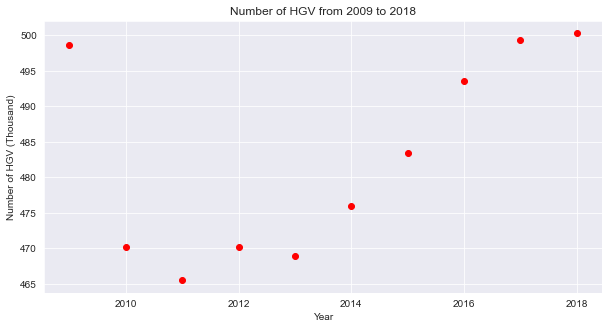

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
# plot a darkgrid with 8*5

plt.scatter(data.Year,data.Num_HGV,color = 'Red')
plt.title('Number of HGV from 2009 to 2018')
plt.xlabel('Year') #name the x axis as "Type of weapon"
plt.ylabel('Number of HGV (Thousand)')

Text(0, 0.5, 'Number of LGV (Thousand)')

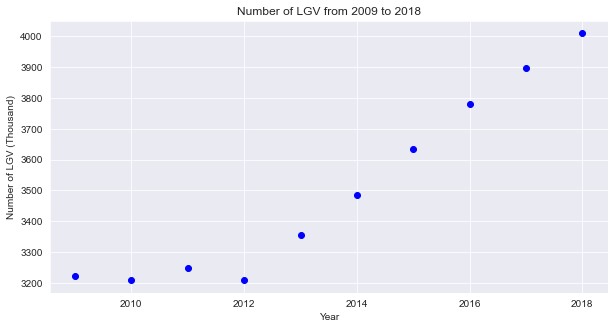

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
# plot a darkgrid with 8*5

plt.scatter(data.Year,data.Num_LGV,color = 'b')
plt.title('Number of LGV from 2009 to 2018')
plt.xlabel('Year') #name the x axis as "Type of weapon"
plt.ylabel('Number of LGV (Thousand)')

Text(0, 0.5, 'Number of Freight Transport (Thousand)')

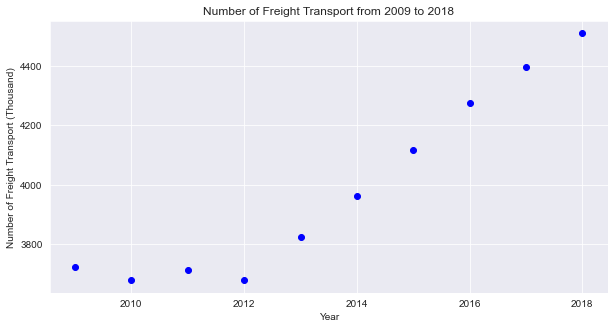

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
# plot a darkgrid with 8*5

plt.scatter(data.Year,data.Num_Freight,color = 'b')
plt.title('Number of Freight Transport from 2009 to 2018')
plt.xlabel('Year') #name the x axis as "Type of weapon"
plt.ylabel('Number of Freight Transport (Thousand)')

Text(0, 0.5, 'Internet Retail Sales (Billions)')

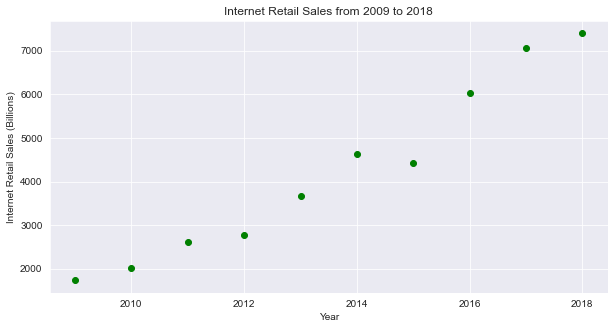

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
# plot a darkgrid with 8*5

plt.scatter(data.Year,data.OL_Sales,color = 'Green')
plt.title('Internet Retail Sales from 2009 to 2018')
plt.xlabel('Year') #name the x axis as "Type of weapon"
plt.ylabel('Internet Retail Sales (Billions)')


In [ ]:
Num_LGV	Num_HGV	OL_Sales	OffL_Sales	Dispo_Income	GDP_Deflator	Employ_Rate	Num_household	Per_Childern	Per_Retired	Neighb_Trust	Popu_Density	Num_PassenCars

Text(0, 0.5, ' Number of Popu_Density')

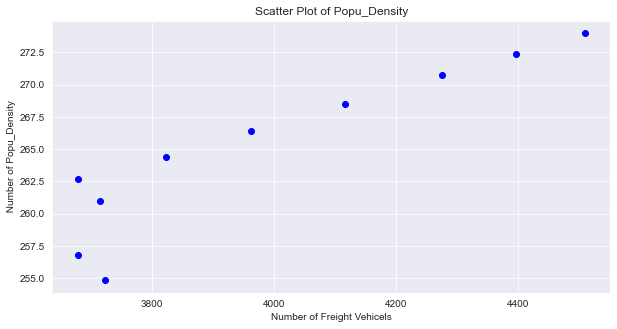

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
# plot a darkgrid with 8*5

plt.scatter(data.Num_Freight,data.Popu_Density,color = 'b')


plt.title('Scatter Plot of Popu_Density')
plt.xlabel('Number of Freight Vehicels') #name the x axis as "Type of weapon"
plt.ylabel(' Number of Popu_Density')


Text(0, 0.5, ' Number of OffL_Sales')

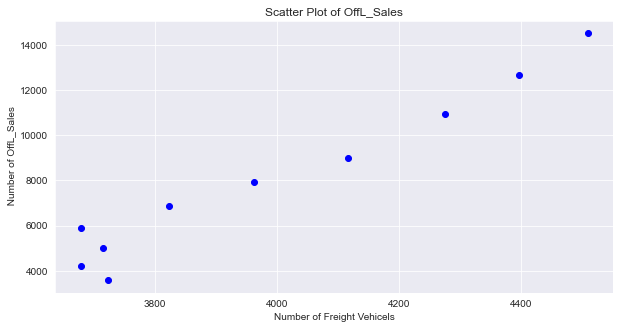

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
# plot a darkgrid with 8*5

plt.scatter(data.Num_Freight,data.OffL_Sales,color = 'b')


plt.title('Scatter Plot of OffL_Sales')
plt.xlabel('Number of Freight Vehicels') #name the x axis as "Type of weapon"
plt.ylabel(' Number of OffL_Sales')

In [10]:
data.shape

(10, 16)

In [63]:
data1 = data.drop(['Year','Dispo_Income', 'Per_Childern','Neighb_Trust','Num_freight'], axis=1)
data1

,Num_LGV,Num_HGV,OL_Sales,OffL_Sales,GDP_Deflator,Employ_Rate,Num_household,Per_Retired,Popu_Density,Num_PassenCars,Num_Freight
0,3223.728,498.626,1728.9,3574.8,79.2,71.3,26041.800000,15.606431,254.817444,16653,3722.354
1,3207.791,470.128,2024.6,4194.9,81.1,70.8,26240.200000,15.807613,256.755673,19686,3677.919
2,3248.293,465.473,2613.7,5020.9,83.3,70.6,26408.600000,16.143746,260.974865,20828,3713.766
3,3207.791,470.128,2772.2,5916.1,86.1,71.4,26614.000000,16.421021,262.706448,21206,3677.919
4,3353.894,468.876,3660.7,6880.5,89.5,71.9,26660.600000,16.857928,264.358853,25188,3822.770
5,3485.657,476.010,4634.5,7915.5,93.4,73.2,26731.900000,17.074991,266.384049,28047,3961.667
6,3633.578,483.361,4430.7,9013.3,96.1,73.9,27041.500000,17.378274,268.500381,31554,4116.939
7,3781.984,493.638,6037.4,10937.1,100.0,74.7,27088.700000,17.414606,270.719396,33490,4275.622
8,3898.149,499.353,7056.0,12664.5,103.9,75.3,27227.700000,17.552552,272.336337,34114,4397.502
9,4009.887,500.287,7400.4,14508.4,107.6,75.7,27379.826828,17.812739,273.966886,32887,4510.174


In [64]:
rDf = data1.corr()
print(rDf)

                 Num_LGV   Num_HGV  OL_Sales  OffL_Sales  GDP_Deflator  \
Num_LGV         1.000000  0.719542  0.977254    0.981714      0.976553   
Num_HGV         0.719542  1.000000  0.620267    0.629238      0.594990   
OL_Sales        0.977254  0.620267  1.000000    0.990515      0.990562   
OffL_Sales      0.981714  0.629238  0.990515    1.000000      0.994086   
GDP_Deflator    0.976553  0.594990  0.990562    0.994086      1.000000   
Employ_Rate     0.984317  0.734968  0.967430    0.967698      0.974271   
Num_household   0.933219  0.482798  0.954751    0.969593      0.981624   
Per_Retired     0.914063  0.450161  0.944292    0.944864      0.972225   
Popu_Density    0.928754  0.466817  0.964868    0.965760      0.982039   
Num_PassenCars  0.935062  0.505713  0.946180    0.934378      0.962923   
Num_Freight     0.999518  0.740748  0.973078    0.977793      0.971270   

                Employ_Rate  Num_household  Per_Retired  Popu_Density  \
Num_LGV            0.984317       0.93

In [58]:
import statsmodels.formula.api as sm
model = sm.ols(formula = 'Num_Freight~OL_Sales ',data = data).fit()

print(model.summary()) 
               


                            OLS Regression Results                            
Dep. Variable:            Num_Freight   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     142.6
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           2.22e-06
Time:                        14:56:43   Log-Likelihood:                -56.583
No. Observations:                  10   AIC:                             117.2
Df Residuals:                       8   BIC:                             117.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3348.6679     58.861     56.891      0.0

C:\Users\Yufei\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [31]:
import statsmodels.formula.api as sm
model = sm.ols(formula = 'Num_Freight~OL_Sales ',data = data).fit()

print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:            Num_Freight   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     142.6
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           2.22e-06
Time:                        13:09:35   Log-Likelihood:                -56.583
No. Observations:                  10   AIC:                             117.2
Df Residuals:                       8   BIC:                             117.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3348.6679     58.861     56.891      0.0

In [ ]:
OL_Sales	OffL_Sales	GDP_Deflator	Employ_Rate	Num_household	Per_Retired	Popu_Density	Num_PassenCars

In [29]:
import statsmodels.formula.api as sm
model = sm.ols(formula = 'Num_Freight~OL_Sales+OffL_Sales+Per_Childern+Per_Retired+Neighb_Trust+Popu_Density+Num_PassenCars ',data = data).fit()

print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:            Num_Freight   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     15.62
Date:                Mon, 07 Sep 2020   Prob (F-statistic):             0.0230
Time:                        12:52:13   Log-Likelihood:                -53.893
No. Observations:                  10   AIC:                             121.8
Df Residuals:                       3   BIC:                             123.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       8492.3485   1.09e+04      0.

In [ ]:
Year
Num_LGV
Num_HGV
OL_Sales
OffL_Sales
Dispo_Income
GDP_Deflator
Employ_Rate
Num_household
Per_Childern
Per_Retired
Neighb_Trust
Popu_Density
Num_PassenCars

In [16]:
+OffL_Sales

NameError: name 'OffL_Sales' is not defined

In [62]:
import statsmodels.formula.api as sm
model = sm.ols(formula = 'Num_Freight ~  OL_Sales+OffL_Sales+ GDP_Deflator ++Num_household+Per_Retired+Popu_Density',data = data).fit()
print(model.summary()) 



                            OLS Regression Results                            
Dep. Variable:            Num_Freight   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     25.63
Date:                Mon, 07 Sep 2020   Prob (F-statistic):             0.0113
Time:                        15:04:17   Log-Likelihood:                -51.478
No. Observations:                  10   AIC:                             117.0
Df Residuals:                       3   BIC:                             119.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.002e+04   1.14e+04      0.876

In [ ]:
+GDP_Deflator +Per_Childern+Num_household+Per_Retired+Popu_Density+Num_PassenCars

Year
Num_LGV
Num_HGV
OL_Sales
OffL_Sales
Dispo_Income
GDP_Deflator
Employ_Rate
Num_household
Per_Childern
Per_Retired
Neighb_Trust
Popu_Density
Num_PassenCars

In [30]:
import statsmodels.formula.api as sm
model = sm.ols(formula = 'Num_Freight ~  OL_Sales+Dispo_Income+Per_Childern+Num_household+Per_Retired+Popu_Density ',data = data).fit()
print(model.summary()) 


                            OLS Regression Results                            
Dep. Variable:            Num_Freight   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     31.99
Date:                Mon, 07 Sep 2020   Prob (F-statistic):            0.00820
Time:                        12:58:09   Log-Likelihood:                -50.389
No. Observations:                  10   AIC:                             114.8
Df Residuals:                       3   BIC:                             116.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4865.4659   7619.833      0.639